/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


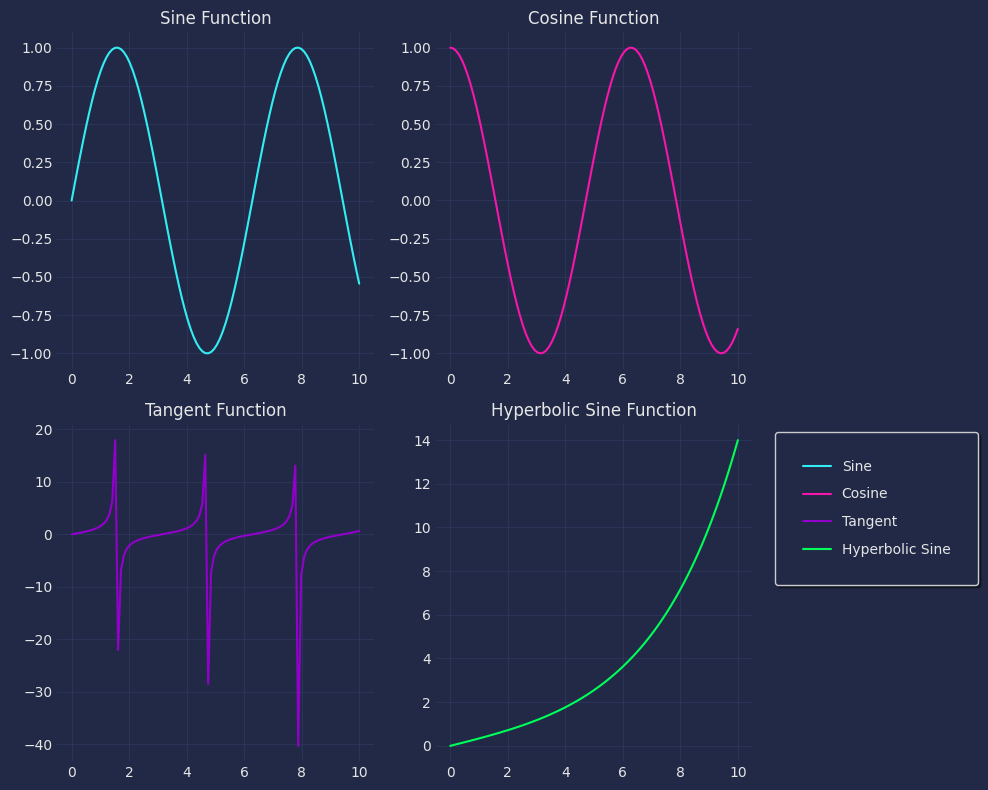

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import kagglehub
import pandas as pd

plt.style.use('cyberpunk')

palette = ['#34EDF3', '#F715AB', '#9201CB', "#00FF59"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.sinh(x / 3)
sin = axs[0, 0].plot(x, y1, color=palette[0])
axs[0, 0].set_title('Sine Function')
cos = axs[0, 1].plot(x, y2, color=palette[1])
axs[0, 1].set_title('Cosine Function')
tang = axs[1, 0].plot(x, y3, color=palette[2])
axs[1, 0].set_title('Tangent Function')
hyp_sin = axs[1, 1].plot(x, y4, color=palette[3])
axs[1, 1].set_title('Hyperbolic Sine Function')
# Add all line objects from all axes to a single legend in axs[0,1]
lines = sin + cos + tang + hyp_sin
labels = ['Sine', 'Cosine', 'Tangent', 'Hyperbolic Sine']
axs[1, 1].legend(lines, labels, shadow = True,frameon = True,bbox_to_anchor=(1.05, 1),borderpad = 2,labelspacing=1,fancybox = True, loc='upper left')
plt.tight_layout()
plt.show()


Regressão Logistica

Matriz de correlação de Pearson:


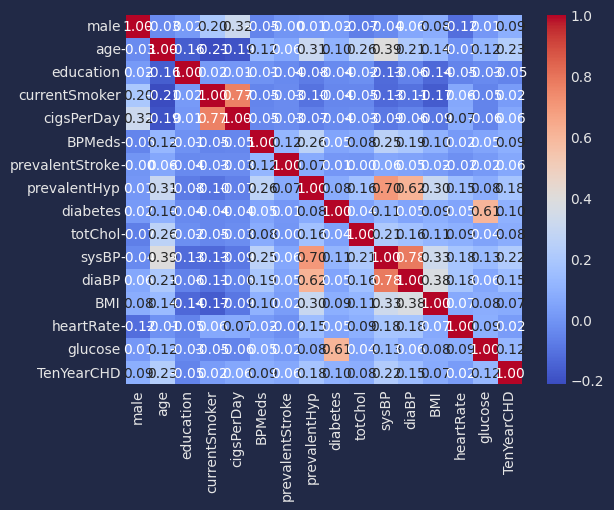

male: int64 
age: int64 
education: float64 
currentSmoker: int64 
cigsPerDay: float64 
BPMeds: float64 
prevalentStroke: int64 
prevalentHyp: int64 
diabetes: int64 
totChol: float64 
sysBP: float64 
diaBP: float64 
BMI: float64 
heartRate: float64 
glucose: float64 
TenYearCHD: int64 


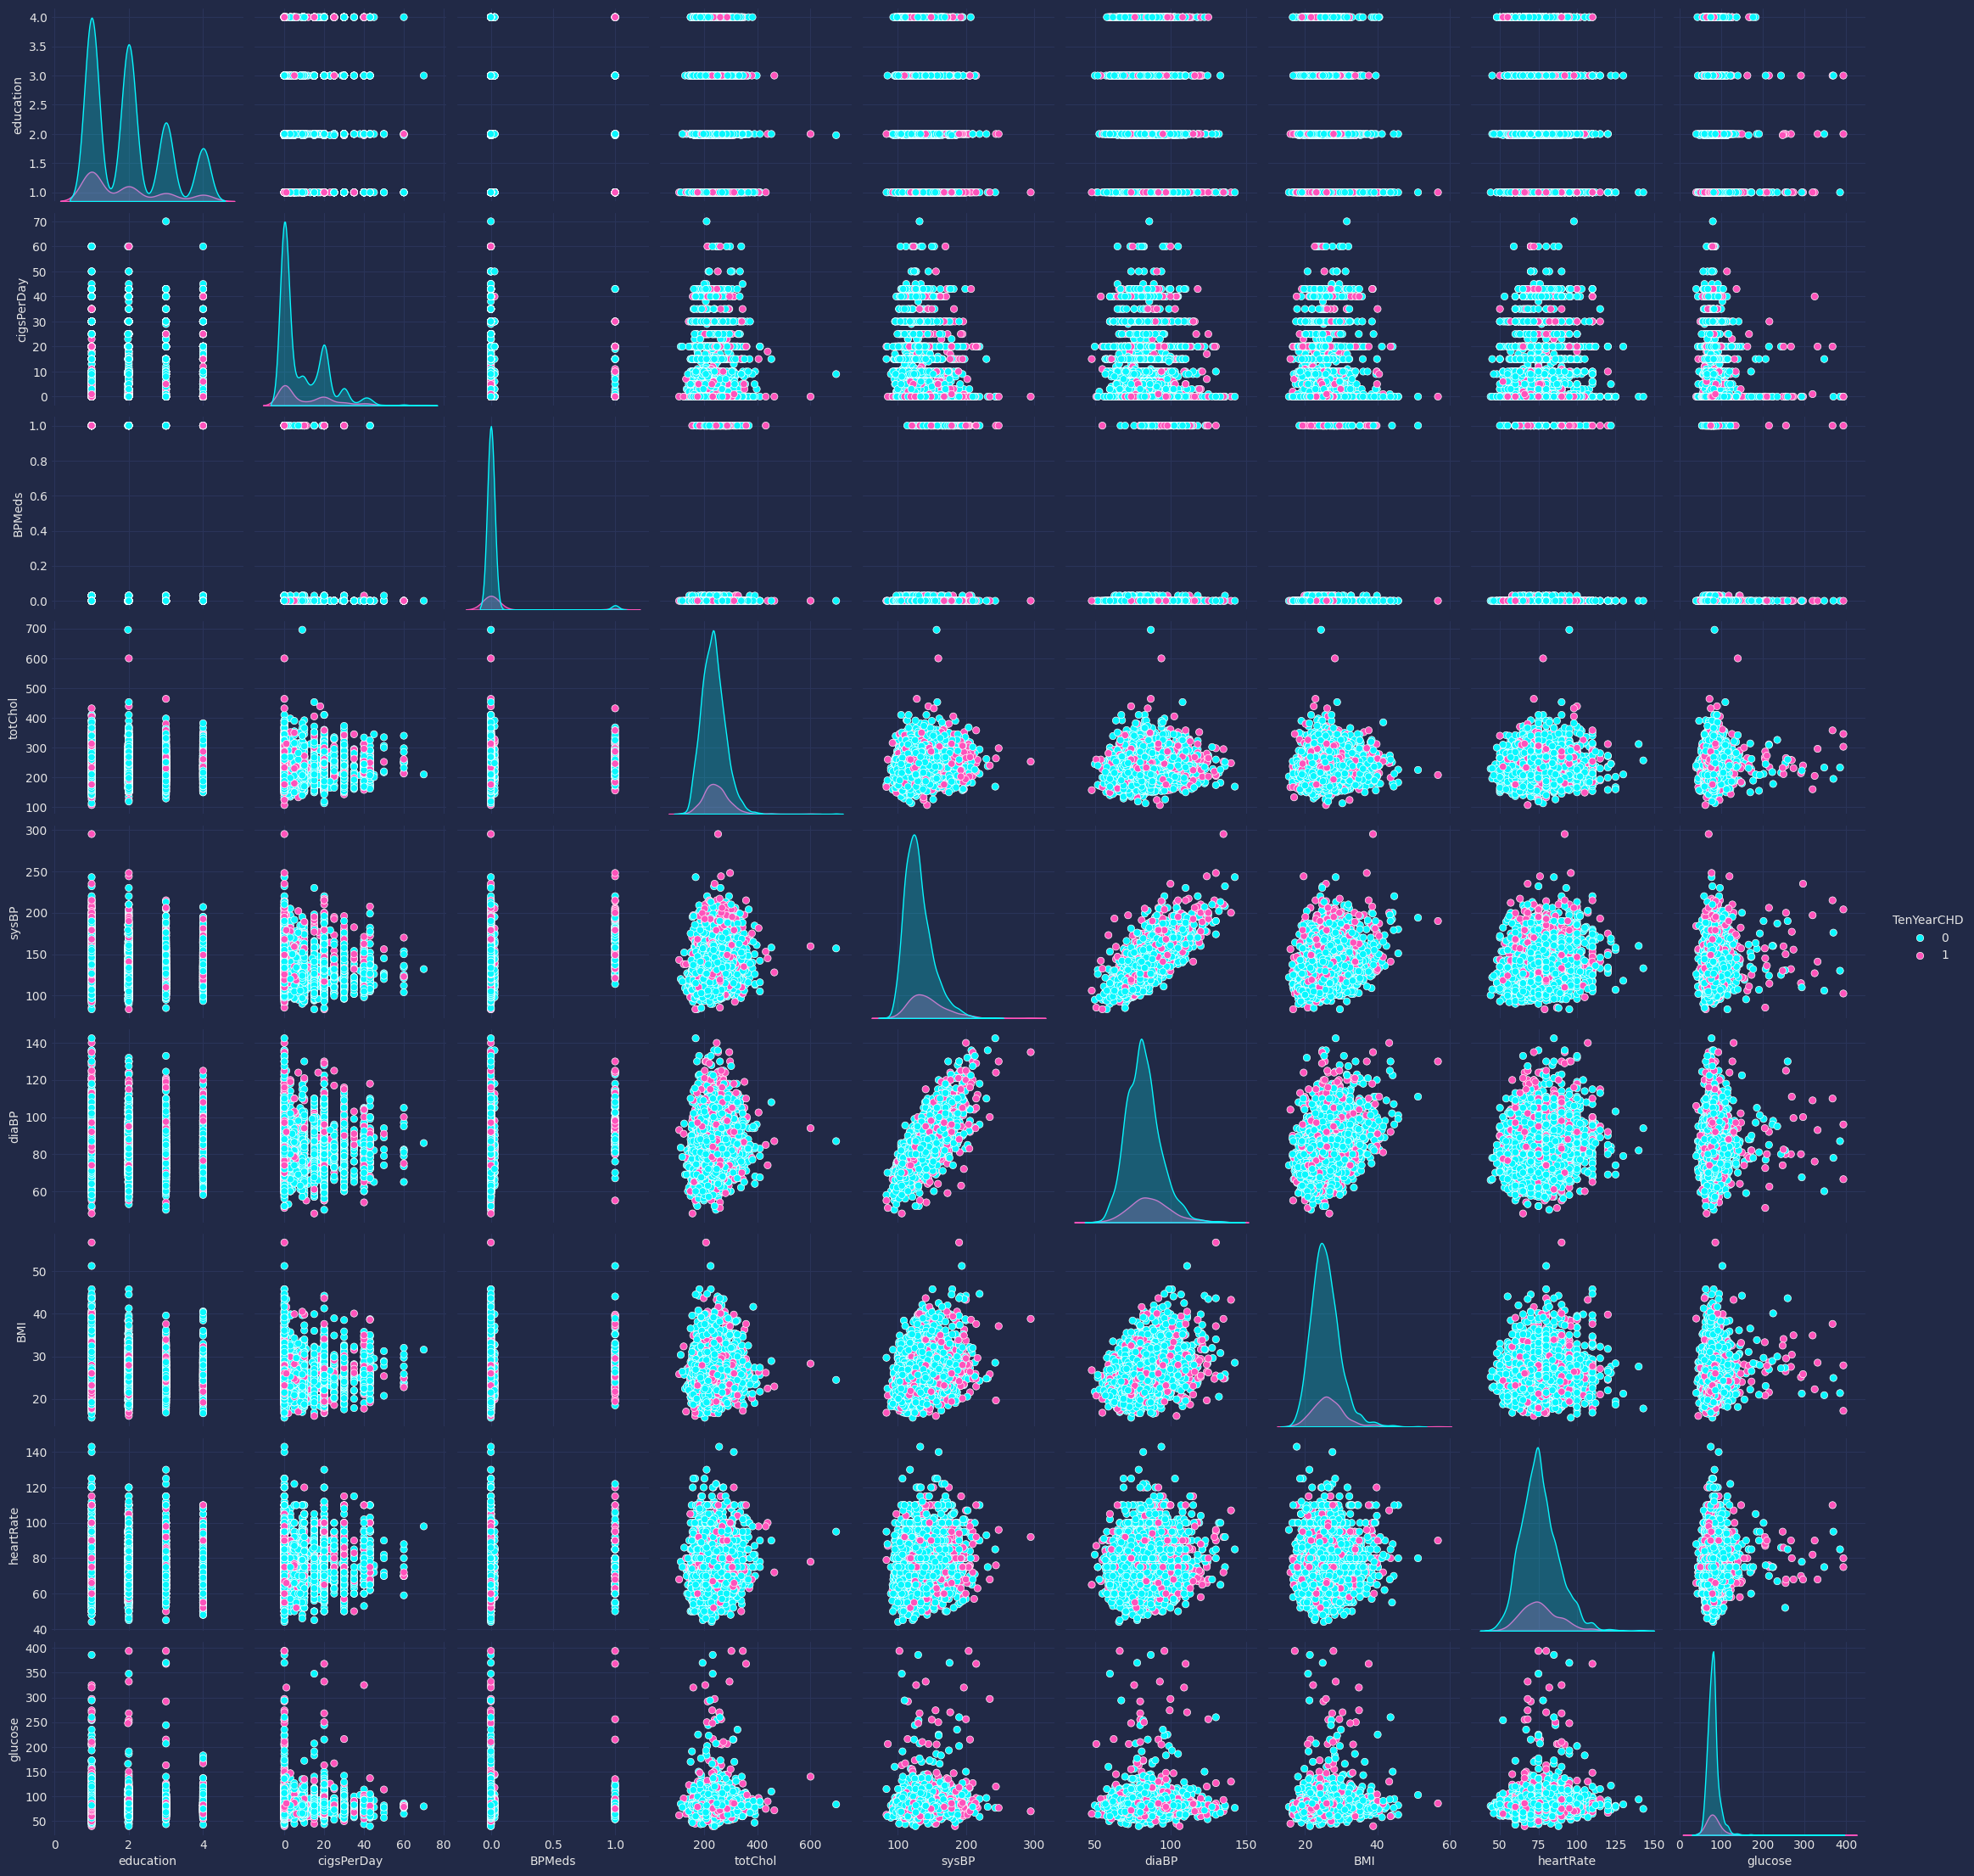

male: 0 - 1
age: 32 - 70
education: 1.0 - 4.0
currentSmoker: 0 - 1
cigsPerDay: 0.0 - 70.0
BPMeds: 0.0 - 1.0
prevalentStroke: 0 - 1
prevalentHyp: 0 - 1
diabetes: 0 - 1
totChol: 113.0 - 696.0
sysBP: 83.5 - 295.0
diaBP: 48.0 - 140.0
BMI: 15.54 - 56.8
heartRate: 44.0 - 143.0
glucose: 40.0 - 394.0


In [2]:
from sklearn.model_selection import train_test_split
from dora import Dora
import seaborn as sns

data_set = pd.read_csv(r"/workspaces/rep_estudos/linear_algebra_notebooks/Regressão Logistica/framingham.csv")
data_set_filtered = data_set.replace(to_replace=np.nan, value=data_set.mean())
# Verificar se a dependiencia estatistica entre variaveis
# Vamos calcular a matriz de correlação de Pearson para as variáveis numéricas
correlation_matrix = data_set_filtered.corr()
print("Matriz de correlação de Pearson:")
plot = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
#Eliminar as que tem correlação maior que 0.5
columns_to_drop = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):# So metade da matriz
#         if abs(correlation_matrix.iloc[i, j]) > 0.5:
#             colname = correlation_matrix.columns[i]
#             columns_to_drop.add(colname)

# data_set_filtered = data_set_filtered.drop(columns=columns_to_drop)

for col in data_set_filtered.columns:
    print(f"{col}: {data_set[col].dtype} ")


data_set_to_double = data_set_filtered.select_dtypes(include=['float64'])
statician = Dora(data_set_to_double.join(data_set_filtered['TenYearCHD']))
statician.pairplot(hue='TenYearCHD')


# Use stratify to keep the same proportion of classes in train/test
sample, test_data = train_test_split(
    data_set_filtered,
    test_size=0.2,
    random_state=50,
    stratify=data_set_filtered['TenYearCHD']
)


colunas = sample.columns
for col in colunas:
    if col != 'TenYearCHD':
        print(f"{col}: {sample[col].min()} - {sample[col].max()}")


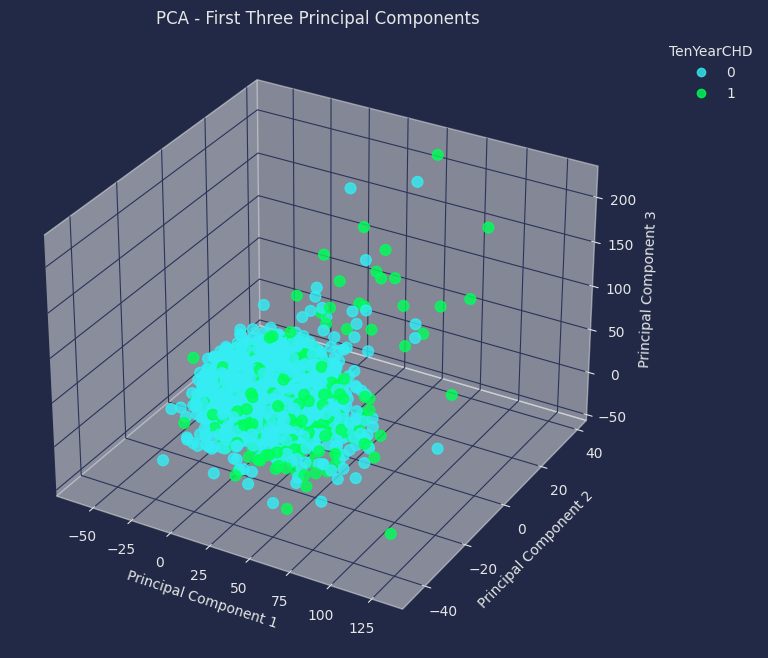

0.48884374684891174
(3390, 4) (848, 4)


In [3]:
from PCA import compute_pca,pca_transform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
predicted = "TenYearCHD"
colormap = LinearSegmentedColormap.from_list("neon", palette, N= 100)

exclude_target = sample.drop(columns=[predicted])
n = 4
eigenvectors, eigenvalues = compute_pca(exclude_target.values, n_components=n)
transformed_data = pca_transform(exclude_target.values, n_components=n)



# 3D scatter plot using the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    transformed_data[:, 0],
    transformed_data[:, 1],
    transformed_data[:, 2],
    c=sample[predicted],
    cmap=colormap,
    s=60,
    alpha=0.8,
)
ax.set_title('PCA - First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title=predicted, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

retained_variance = np.sum(eigenvalues) / len(sample.columns)
print(retained_variance)
#so, 9 features explain 80% of variance
features_that_i_will_use = eigenvectors[:, :n]
sample_reduced = np.dot(exclude_target.values, features_that_i_will_use)
test_data_reduced = np.dot(test_data.drop(columns=[predicted]).values, features_that_i_will_use)
print(sample_reduced.shape, test_data_reduced.shape)

In [4]:
# Results with Sklearn, but i want to code it from scratch later
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y = sample[predicted].values
Y_test = test_data[predicted].values

X = sample_reduced
X_test = test_data_reduced

#normalize everything

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(X, Y)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
confusion = confusion_matrix(Y_test,Y_pred)
print(confusion)
print('Classification Report:')
print(classification_report(Y_test, Y_pred))
#=> The model is just classifying everything as negative 



'''
Confusion Matrix:
[[728   0]
 [  4   0]]
'''
plt.show()


Accuracy: 0.65
Confusion Matrix:
[[473 246]
 [ 50  79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       719
           1       0.24      0.61      0.35       129

    accuracy                           0.65       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.80      0.65      0.70       848



Execution time: 2.809762 seconds
(array([-0.39534984,  0.65639219,  0.27792578, -0.32367437,  0.15177937,
        0.4686721 , -0.00462754,  0.2792409 , -0.35103003,  0.45668387,
        0.17950867, -0.20352844,  0.52327686,  0.33713852, -0.33279261,
       -0.05230146,  0.09397256, -0.05748259,  0.09529124,  0.08974114,
       -0.33411482, -0.4897008 ,  0.44386583, -0.18089611,  0.40398   ,
       -0.48019805,  0.81256201, -0.24443292, -0.42680554, -0.86373384,
       -0.68335464, -0.11293228, -0.42687442,  0.48592009, -0.10290201,
       -0.20466407,  0.22528004,  0.21724717,  0.29413062,  0.59077988]), [np.float64(0.6931471805599434), np.float64(0.6929531955151002), np.float64(0.6927592848183594), np.float64(0.6925654484655165), np.float64(0.6923716864523342), np.float64(0.692177998774542), np.float64(0.6919843854278367), np.float64(0.6917908464078819), np.float64(0.6915973817103086), np.float64(0.6914039913307147), np.float64(0.6912106752646651), np.float64(0.691017433507692), np.fl

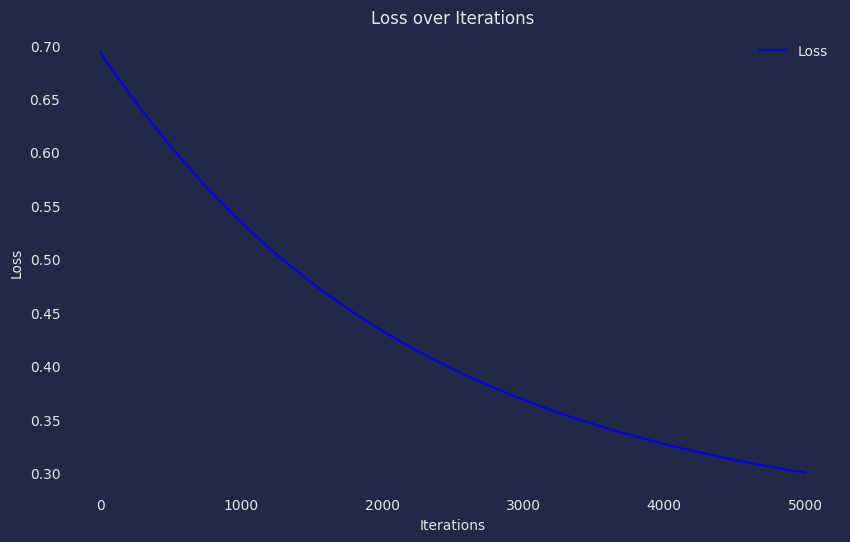

Optimized weights: [-0.39534984  0.65639219  0.27792578 -0.32367437  0.15177937  0.4686721
 -0.00462754  0.2792409  -0.35103003  0.45668387  0.17950867 -0.20352844
  0.52327686  0.33713852 -0.33279261 -0.05230146  0.09397256 -0.05748259
  0.09529124  0.08974114 -0.33411482 -0.4897008   0.44386583 -0.18089611
  0.40398    -0.48019805  0.81256201 -0.24443292 -0.42680554 -0.86373384
 -0.68335464 -0.11293228 -0.42687442  0.48592009 -0.10290201 -0.20466407
  0.22528004  0.21724717  0.29413062  0.59077988]
[[170   0]
 [100 230]]
Custom Logistic Regression Accuracy: 0.80


/workspaces/rep_estudos/linear_algebra_notebooks/Regressão Logistica/LogisticRegression.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


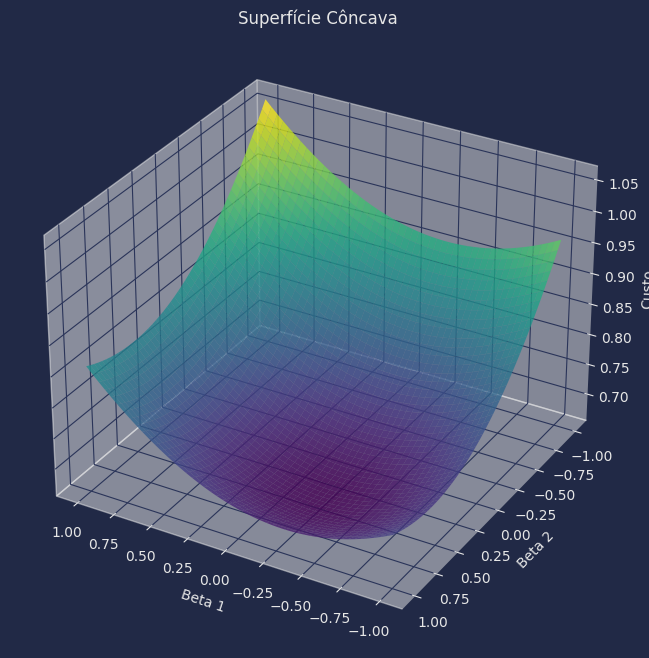

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from LogisticRegression import LogisticRegression

Learning_parameteres ={
        "learning_rate": 0.00005,
        "tolerance": 1e-9,
        "maxIterations": 50000,
        "method": "Gradient Descent"
}

#normalize everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
Y = Y.astype(int)
Y_test = Y_test.astype(int)
b_0 = np.zeros(X.shape[1])


model = LogisticRegression(X, Y, b_0, learning_rate=Learning_parameteres["learning_rate"])
optimization_result = model.optimize(markTime=True, method=Learning_parameteres['method'], maxIterations=Learning_parameteres["maxIterations"])
print(optimization_result)
final_b = optimization_result[0]
losses = optimization_result[1]
if type(losses) == list:
    if len(losses) > 1:
        model.plot_losses(losses)
print("Optimized weights:", final_b)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test, model.inv_Logistic_link(X_test @ final_b) >= 0.55)
confusion = confusion_matrix(Y_test, model.inv_Logistic_link(X_test @ final_b) >= 0.55)
print(confusion)
print(f'Custom Logistic Regression Accuracy: {accuracy:.2f}')
model.plot_loss_surface_zoomed()


Execution time: 1.118009 seconds
[array([ -39.82710188,   92.63931403,   48.95844713,  -34.54378564,
         11.53918794,   77.40068789,   24.5023203 ,   49.19148625,
        -56.85987039,   62.29909641,   15.29211279,  -11.82001162,
         77.07776274,   60.78498178,  -70.82471328,    3.17850739,
          8.48521806,  -13.88253315,   -0.66268455,    0.50298953,
        -65.60709385,  -75.7735475 ,   46.94297342,  -25.13035133,
         82.06872505,  -72.80868411,  117.27549962,  -29.32648554,
        -78.38620582, -121.94842615, -114.31115041,  -12.37022478,
        -65.13413255,   88.86822944,  -20.14420937,  -28.73947622,
         30.64986525,   20.13506218,   32.08354054,   55.54965271]), [np.float64(0.915622491912519), np.float64(0.6988723604586603), np.float64(0.5816339015191355), np.float64(0.5045401298504539), np.float64(0.4483429578662587), np.float64(0.4046824119927276), np.float64(0.3692637010766919), np.float64(0.3396257322703942), np.float64(0.3142463395046519), np.flo

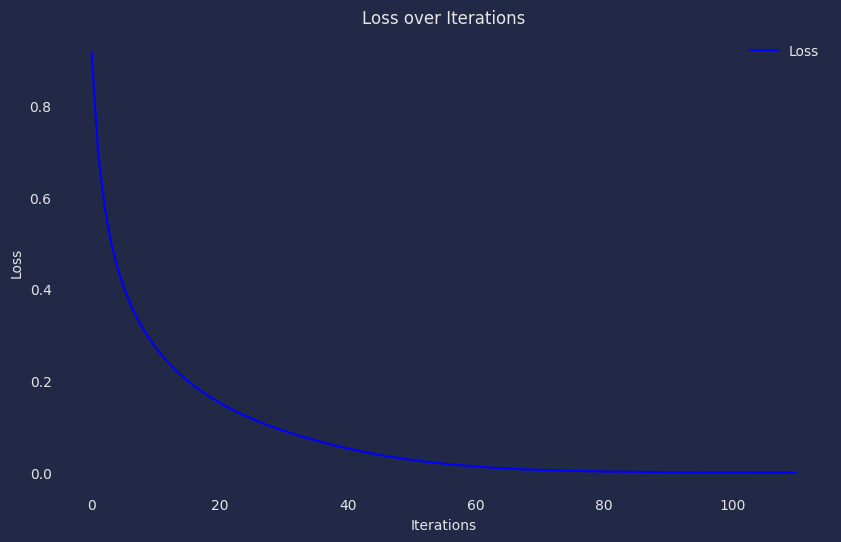

/workspaces/rep_estudos/linear_algebra_notebooks/Regressão Logistica/LogisticRegression.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


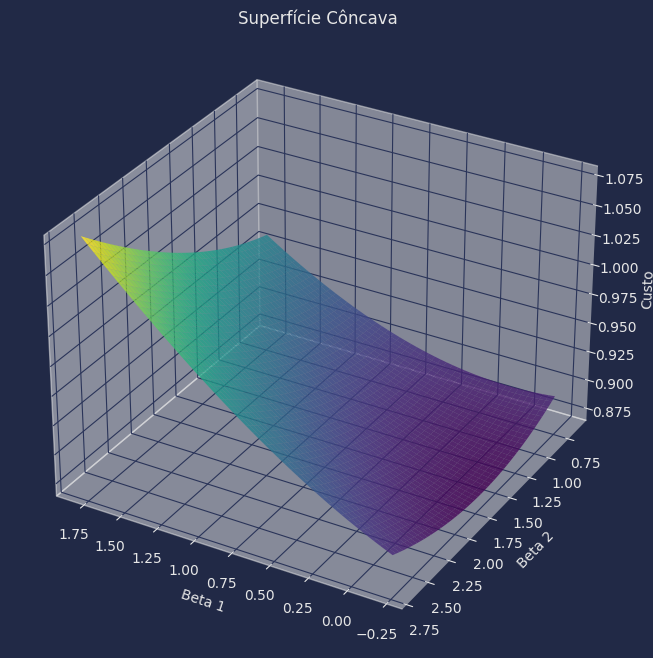

In [15]:

X  = np.random.rand(500, 40)
nsamples, nfeatures = X.shape

real_bs = np.array([np.random.randn() for _ in range(nfeatures)])
probs = 1 / (1 + np.exp(-X @ real_bs))
Y = (probs > 0.5).astype(int)
X_test =  np.random.rand(nsamples, nfeatures)
test_props = 1 / (1 + np.exp(-X_test @ real_bs))
Y_test = (test_props > 0.5).astype(int)
b_o_0 = np.random.randn(X.shape[1])
test_model = LogisticRegression(X, Y, b_o_0, learning_rate=.01)

optimization_result = test_model.optimize(markTime=True, method="NewtonRaphson", maxIterations=1110)
final_b = optimization_result[0]
print(optimization_result)
accuracy = accuracy_score(Y_test, test_model.inv_Logistic_link(X_test @ final_b) >= 0.5)
print("Optimized weights:", final_b)
print(f'Custom Logistic Regression Accuracy on synthetic data: {accuracy:.2f}')
if type(optimization_result[1]) == list:
    if len(optimization_result[1]) > 1:
        test_model.plot_losses(optimization_result[1])

test_model.plot_loss_surface_zoomed()
